<a href="https://colab.research.google.com/github/ihassanjavaid/Fundus-Analysis/blob/main/Fundus_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fundus Analysis

**Dataset:** [Fundus Dataset](https://www.kaggle.com/andrewmvd/ocular-disease-recognition-odir5k)

*   Muhammad Hasan Malik
*   FA17-BSE-083 - BSCS-7A


---




**Mount The Drive**

In [ ]:
from google.colab import drive

# mount the drive to this path
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Configure the working directory

In [ ]:
import os

# set the kaggle configuration directory
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

Chane the working directory

In [ ]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [ ]:
# download the kaggle.json API token and place it into this directory
# to fetch data from kaggle into this directory

!ls

kaggle.json


**Download Data from Kaggle to Colab**

In [ ]:
!kaggle datasets download -d andrewmvd/ocular-disease-recognition-odir5k

 99% 1.61G/1.62G [00:40<00:00, 67.1MB/s]
100% 1.62G/1.62G [00:41<00:00, 42.4MB/s]


In [ ]:
!ls

kaggle.json  ocular-disease-recognition-odir5k.zip


**Un-Zip the Data**

In [ ]:
!unzip \*.zip  && rm *.zip

# Output of this cell is removed as it exceeded 5000 lines

In [ ]:
# unzipped data

!ls

full_df.csv  kaggle.json  ODIR-5K  preprocessed_images


**Data Preparation**

In [ ]:
import pandas as pd

# load the csv files having labels information into dataframe
df = pd.read_csv('/content/gdrive/MyDrive/Kaggle/full_df.csv')
df.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


In [ ]:
# make a new directory to store all the images in a new folder

!mkdir images

In [ ]:
# show the new directory

!ls

full_df.csv  images  kaggle.json  ODIR-5K  preprocessed_images


**Copy all the training and testing images into one folder**

In [ ]:
import os
import shutil
from tqdm.notebook import tqdm

# Copy training images to images directory

# the source from where the images are to be copied
src = '/content/gdrive/MyDrive/Kaggle/ODIR-5K/ODIR-5K/Training Images'

src_files = os.listdir(src)

# the destiation to where images are copied
dest = '/content/gdrive/MyDrive/Kaggle/images'

# name every image accordingly
for file_name in tqdm(src_files):
    full_file_name = os.path.join(src, file_name)
    if os.path.isfile(full_file_name):
        shutil.copy(full_file_name, dest)

In [ ]:
# Copy testing images to images directory

# the source from where the images are to be copied
src = '/content/gdrive/MyDrive/Kaggle/ODIR-5K/ODIR-5K/Testing Images'

src_files = os.listdir(src)

# name every image accordingly
for file_name in tqdm(src_files):
    full_file_name = os.path.join(src, file_name)
    if os.path.isfile(full_file_name):
        shutil.copy(full_file_name, dest)

In [ ]:
directory = '/content/gdrive/MyDrive/Kaggle/images'

# see if all of the images are copied
print(len([name for name in os.listdir(directory) if os.path.isfile(os.path.join(directory, name))]))

8000


**Categorize images into folders according to their classes**

In [ ]:
# make directory for categorized images

!mkdir categorized_images

In [ ]:
# change the working directory

%cd categorized_images
%pwd

/content/gdrive/My Drive/Kaggle/categorized_images


'/content/gdrive/My Drive/Kaggle/categorized_images'

In [ ]:
# make directories of all classes

!mkdir Normal
!mkdir Cataract
!mkdir Myopia

In [ ]:
# go back to main working directory

%cd ..

/content/gdrive/My Drive/Kaggle


In [ ]:
# copy the dataframe into new variable

data_info = df
data_info.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


**Make lists according to their classes**

In [ ]:
#%% md **Cataract**

#%%

left_info = data_info[['Left-Fundus', 'Left-Diagnostic Keywords']]
left_info.head()

#%%

left_cataract_list = []

for i, row in left_info.iterrows():
    if ('cataract' in row['Left-Diagnostic Keywords']) or ('Cataract' in row['Left-Diagnostic Keywords']):
        left_cataract_list.append(row['Left-Fundus'])

len(left_cataract_list)

#%%

right_info = data_info[['Right-Fundus', 'Right-Diagnostic Keywords']]
right_info.head()

#%%


right_cataract_list = []

for i, row in right_info.iterrows():
    if ('cataract' in row['Right-Diagnostic Keywords']) or ('Cataract' in row['Right-Diagnostic Keywords']):
        right_cataract_list.append(row['Right-Fundus'])

len(right_cataract_list)

#%%

cataract_list = left_cataract_list
cataract_list.extend(right_cataract_list)
len(cataract_list)

#%% md **Normal**

#%%

left_normal_list = []

for i, row in left_info.iterrows():
    if ('normal' in row['Left-Diagnostic Keywords']) or ('Normal' in row['Left-Diagnostic Keywords']):
        left_normal_list.append(row['Left-Fundus'])

len(left_normal_list)

#%%

right_normal_list = []

for i, row in right_info.iterrows():
    if ('normal' in row['Right-Diagnostic Keywords']) or ('Normal' in row['Right-Diagnostic Keywords']):
        right_normal_list.append(row['Right-Fundus'])

len(right_normal_list)

#%%

normal_list = left_normal_list
normal_list.extend(right_normal_list)

len(normal_list)

#%% md **Diabetes**

#%%

diabetes_list = []

for i, row in data_info.iterrows():
    if row['D'] == 1:
        diabetes_list.append(row['Left-Fundus'])
        diabetes_list.append(row['Right-Fundus'])

len(diabetes_list)

#%% md **AMD**

#%%

AMD_list = []

for i, row in data_info.iterrows():
    if row['A'] == 1:
        AMD_list.append(row['Left-Fundus'])
        AMD_list.append(row['Right-Fundus'])

len(AMD_list)

#%% md **Glaucoma**

#%%

glaucoma_list = []

for i, row in data_info.iterrows():
    if row['G'] == 1:
        glaucoma_list.append(row['Left-Fundus'])
        glaucoma_list.append(row['Right-Fundus'])

len(glaucoma_list)

#%% md **Hyper tension**

#%%

hypertension_list = []

for i, row in data_info.iterrows():
    if row['H'] == 1:
        hypertension_list.append(row['Left-Fundus'])
        hypertension_list.append(row['Right-Fundus'])

len(hypertension_list)

#%% md **Pathological Myopia**

#%%

myopia_list = []

for i, row in data_info.iterrows():
    if row['M'] == 1:
        myopia_list.append(row['Left-Fundus'])
        myopia_list.append(row['Right-Fundus'])

len(myopia_list)

#%% md **Glaucoma**

#%%

other_list = []

for i, row in data_info.iterrows():
    if row['O'] == 1:
        other_list.append(row['Left-Fundus'])
        other_list.append(row['Right-Fundus'])

len(other_list)

#%%

print("Normal fundus: {}".format(len(normal_list)))
print("Diabetic fundus: {}".format(len(diabetes_list)))
print("Cataract fundus: {}".format(len(cataract_list)))
print("Hypertension fundus: {}".format(len(hypertension_list)))
print("Glaucoma fundus: {}".format(len(glaucoma_list)))
print("Myopia fundus: {}".format(len(myopia_list)))
print("AMD fundus: {}".format(len(AMD_list)))
print("Other fundus: {}".format(len(other_list)))


Normal fundus: 5683
Diabetic fundus: 4246
Cataract fundus: 594
Hypertension fundus: 406
Glaucoma fundus: 794
Myopia fundus: 612
AMD fundus: 638
Other fundus: 3176


**Copy images to their respective directories**

Normal Fundus

In [ ]:
# set the destination to be the class name of the image
dest = '/content/gdrive/MyDrive/Kaggle/categorized_images/Normal'

# copy the images of that class to that directory
for image in tqdm(normal_list):
    full_path = '/content/gdrive/MyDrive/Kaggle/images/' + image
    try:
        shutil.copy2(full_path, dest)
    except Exception as err:
        print(err)
        continue

Cataract Fundus

In [ ]:
# set the destination to be the class name of the image
dest = '/content/gdrive/MyDrive/Kaggle/categorized_images/Cataract'

# copy the images of that class to that directory
for image in tqdm(cataract_list):
    full_path = '/content/gdrive/MyDrive/Kaggle/images/' + image
    try:
        shutil.copy2(full_path, dest)
    except Exception as err:
        print(err)
        continue

Myopic Fundus

In [ ]:
# set the destination to be the class name of the image
dest = '/content/gdrive/MyDrive/Kaggle/categorized_images/Myopia'

# copy the images of that class to that directory
for image in tqdm(myopia_list):
    full_path = '/content/gdrive/MyDrive/Kaggle/images/' + image
    shutil.copy2(full_path, dest)

**Data Preparation**

In [ ]:
import tensorflow as tf 

# make a data generator that augments data so that the model's predictions can be better by using more amount of data
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode="nearest",
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.05,
    dtype=None,
    rescale = 1.0/255.0
    # rescale = None
)

In [ ]:
# set the directory from where images are to be taked from
dire = '/content/gdrive/MyDrive/Kaggle/categorized_images'

# make the training set generator 
train_generator = datagen.flow_from_directory(
    dire,
    batch_size=32,
    class_mode='categorical',                           
    target_size=(224,224),
    subset='training'
)

# make the test set generator 
test_generator = datagen.flow_from_directory(
    dire,
    batch_size=32,
    class_mode='categorical',                           
    target_size=(224,224),
    subset='validation'
)

Found 3432 images belonging to 3 classes.
Found 180 images belonging to 3 classes.


**Model**

In [ ]:
from keras.applications.resnet_v2 import ResNet152V2

# import the base model from keras - ResNet152V2
# the base model is using imagenet weights without top
base = ResNet152V2(
    weights = 'imagenet',
    include_top = False, 
    input_shape = (224,224,3)
)

234561536/234545216 [==============================] - 8s 0us/step


In [ ]:
# freeze the base model

for layer in base.layers:
    layer.trainable = False

In [ ]:
from tensorflow.keras import Sequential
from keras import layers
from tensorflow.keras.layers import Flatten, Dense

# Following is the Custom Architecture of the Model

# initialize the keras sequential model
model = Sequential()

# add the base model i.e. ResNet152V2 to the sequential model
model.add(base)

# flatten the output of the base model
model.add(Flatten())

# add dense layers to the model with 512, 256 and 128 neurons
# each dense layer followed by dropout layer to prevent overfitting

model.add(Dense(512, activation='relu'))
model.add(layers.Dropout(rate=0.5))

model.add(Dense(256, activation='relu'))
model.add(layers.Dropout(rate=0.3))

model.add(Dense(128, activation='relu'))
model.add(layers.Dropout(rate=0.1))

# flatten the output of the dense layers

model.add(Flatten())

# the final layer consists of 3 neurons as there are 3 classes
# activated by softmax function because of categorical nature

model.add(Dense(3, activation="softmax"))

In [ ]:
# the model object

model

In [ ]:
from tensorflow import keras

# compile the model so that it can be trained

model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=[keras.metrics.CategoricalAccuracy()])

In [ ]:
# check the GPU

!nvidia-smi

Tue Jun  8 08:46:20 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    73W / 149W |    632MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from tensorflow import test

# check if the GPU is mounted and ready for training
test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [ ]:
from tensorflow.keras.callbacks import  EarlyStopping

# Start the training of the model

# define the stops so the model stops training if the accuracy or loss is becomes constant at any point
stop_acc = EarlyStopping(monitor = "categorical_accuracy", min_delta = 0.0001, patience = 10, restore_best_weights = True, mode='auto')
stop_loss = EarlyStopping(monitor = "loss", min_delta = 0.0001, patience = 10, restore_best_weights = True, mode='auto')
stop_val_acc = EarlyStopping(monitor = "val_categorical_accuracy", min_delta = 0.0001, patience = 10, restore_best_weights = True, mode='auto')
stop_val_loss = EarlyStopping(monitor = "val_loss", min_delta = 0.0001, patience = 10, restore_best_weights = True, mode='auto')

history = model.fit(
    train_generator,
    batch_size = 32,
    epochs = 50,
    validation_data = test_generator,
    callbacks = [stop_acc, stop_loss, stop_val_acc, stop_val_loss]
)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4870: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`categorical_crossentropy` received `from_logits=True`, but '


108/108 [==============================] - 244s 2s/step - loss: 3.6416 - categorical_accuracy: 0.8167 - val_loss: 1.7352 - val_categorical_accuracy: 0.8667
Epoch 2/50
108/108 [==============================] - 223s 2s/step - loss: 1.0374 - categorical_accuracy: 0.8753 - val_loss: 0.5881 - val_categorical_accuracy: 0.8833
Epoch 3/50
108/108 [==============================] - 227s 2s/step - loss: 0.5693 - categorical_accuracy: 0.8878 - val_loss: 0.4925 - val_categorical_accuracy: 0.8667
Epoch 4/50
108/108 [==============================] - 227s 2s/step - loss: 0.3587 - categorical_accuracy: 0.9111 - val_loss: 0.4474 - val_categorical_accuracy: 0.9056
Epoch 5/50
108/108 [==============================] - 227s 2s/step - loss: 0.2817 - categorical_accuracy: 0.9254 - val_loss: 0.4494 - val_categorical_accuracy: 0.8833
Epoch 6/50
108/108 [==============================] - 226s 2s/step - loss: 0.2687 - categorical_accuracy: 0.9248 - val_loss: 0.4084 - val_categorical_accuracy: 0.8889
Epoch 7/5

**Model's Performance Statistics**

Accuracy

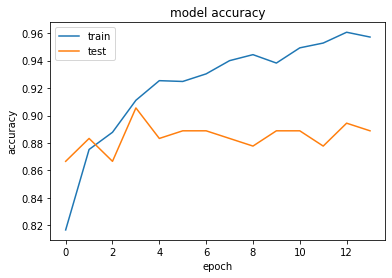

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.legend(['train', 'test'], loc='upper left')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

Loss

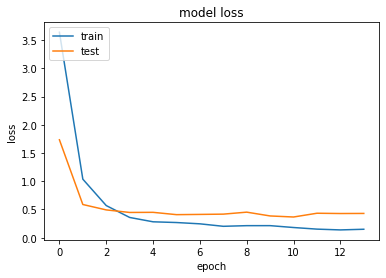

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'test'], loc='upper left')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

**Fine-Tuning the Model**

In [ ]:
# Unfreeze the base model

base.trainable = True

In [ ]:
from tensorflow import keras

# recompile the model with lower learning rate to fine tine and increase accuracy

model.compile(optimizer=keras.optimizers.Adam(1e-5),
              loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=[keras.metrics.CategoricalAccuracy()])

In [ ]:
# train the model again with lower learning rate and same stops/checkpoints

history = model.fit(
    train_generator,
    batch_size = 32,
    epochs = 30,
    validation_data = test_generator,
    callbacks = [stop_acc, stop_loss, stop_val_acc, stop_val_loss]
)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4870: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`categorical_crossentropy` received `from_logits=True`, but '


108/108 [==============================] - 307s 3s/step - loss: 0.5291 - categorical_accuracy: 0.8555 - val_loss: 0.4783 - val_categorical_accuracy: 0.8556
Epoch 2/30
108/108 [==============================] - 284s 3s/step - loss: 0.2486 - categorical_accuracy: 0.9260 - val_loss: 0.4424 - val_categorical_accuracy: 0.8722
Epoch 3/30
108/108 [==============================] - 285s 3s/step - loss: 0.1707 - categorical_accuracy: 0.9400 - val_loss: 0.4241 - val_categorical_accuracy: 0.8667
Epoch 4/30
108/108 [==============================] - 285s 3s/step - loss: 0.1373 - categorical_accuracy: 0.9531 - val_loss: 0.5218 - val_categorical_accuracy: 0.8889
Epoch 5/30
108/108 [==============================] - 285s 3s/step - loss: 0.1087 - categorical_accuracy: 0.9639 - val_loss: 0.5277 - val_categorical_accuracy: 0.8889
Epoch 6/30
108/108 [==============================] - 297s 3s/step - loss: 0.0890 - categorical_accuracy: 0.9685 - val_loss: 0.5464 - val_categorical_accuracy: 0.8833
Epoch 7/3

Accuracy

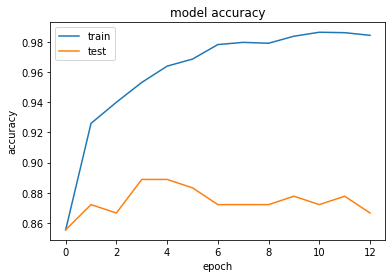

In [ ]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.legend(['train', 'test'], loc='upper left')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

Loss

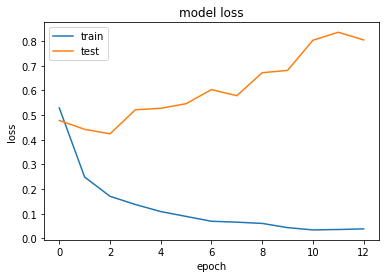

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'test'], loc='upper left')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

**Save the Model**

In [ ]:
%pwd

'/content/gdrive/MyDrive/Kaggle'

In [ ]:
model.save('/content/gdrive/MyDrive/Kaggle/model', save_format='H5')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Kaggle/model/assets


INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Kaggle/model/assets


**Testing**

Image Loading

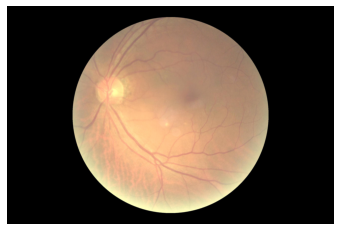

In [ ]:
from keras.preprocessing.image import load_img

# load the image to show here
img = load_img('/content/gdrive/MyDrive/Kaggle/ODIR-5K/ODIR-5K/Training Images/1010_left.jpg')
plt.imshow(img)
plt.axis("off")
plt.show()

Image Preprocessing

In [ ]:
from keras.preprocessing.image import img_to_array

# load image with target size
processed_image = load_img('/content/gdrive/MyDrive/Kaggle/ODIR-5K/ODIR-5K/Training Images/1010_left.jpg', target_size=(224, 224))

# convert image to array
processed_image = img_to_array(processed_image)

# normalize the image
processed_image = processed_image / 255.0

# reshape the image 
processed_image = processed_image.reshape((1, processed_image.shape[0], processed_image.shape[1], processed_image.shape[2]))
# processed_image = keras_models.resnet_v2.preprocess_input(processed_image)
      

Prediction

In [ ]:
import numpy as np

# make the prediction from the model
prediction = model.predict(processed_image)

# get the index of the prediction 
# i.e. the index of the highest percentage
index = int(np.argmax(prediction[0]))

In [ ]:
def get_analysis_label(label):
    label = int(label)
    if label == 0:
        return 'Cataract'
    elif label == 1:
        return 'Myopia'
    elif label == 2:
        return 'Normal'
    else:
        return 'Undefined'

In [ ]:
# get the name of the index

label = get_analysis_label(index)

In [ ]:
# Finally, print the result

print(label)

Normal
